### Example Notebook of all SSA / ODE methods with N colors

Lets load in an H2B construct with two different probe locations


In [1]:
import os
os.chdir('..')
os.chdir('..')
print(os.getcwd())
import rsnapsim as rss
import numpy as np
import matplotlib.pyplot as plt

os.chdir('rsnapsim')
os.chdir('interactive_notebooks')


poi_strs, poi_objs, tagged_pois, raw_seq = rss.seqmanip.open_seq_file('../gene_files/H2B_2Tags.txt')
H2B_obj = tagged_pois['1'][0]

rss.solver.protein = H2B_obj #pass the protein object
t = np.linspace(0,1000,1001)
solution = rss.solver.solve_ssa(H2B_obj.kelong, t, ki=.033, kt = 10, low_memory=False,record_stats=True)
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15





C:\Users\willi\Documents\GitHub\rSNAPsim
importing C++ models
c++ models loaded successfully
importing C++ models
c++ models loaded successfully


(2, 1001, 100)
Low memory, no recording: solved in 6.370590 seconds


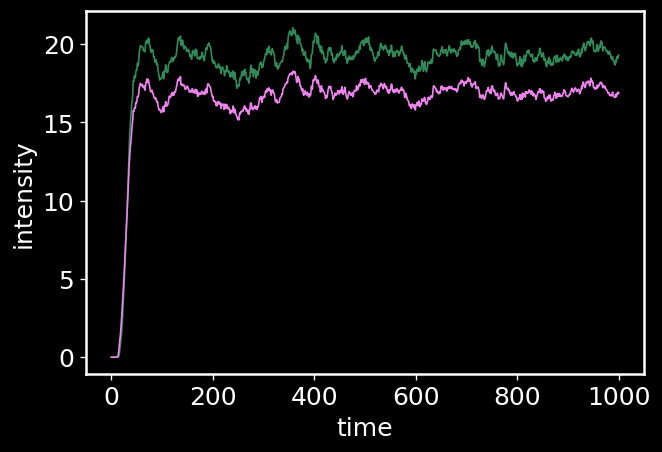

In [2]:
import time
#with recording and low memory
sttime = time.time()
#rss.solver.colors=2

ssa_soln = rss.solver.solve_ssa(H2B_obj.kelong ,t,ki = .33,n_traj=100)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)



In [3]:
np.mean(np.mean(ssa_soln.intensity_vec[:,100:,:],axis=2),axis=1)

array([19.26208657, 16.8854273 ])

### this is sort of boring, lets change up the probes a bit

{'T_Flag': [157, 167, 249, 258], 'T_Hemagglutinin': [133, 144, 239]}
{'T_Flag': [10, 20, 30, 40, 50, 60, 70], 'T_Hemagglutinin': [300, 330, 340, 350]}


C:\Users\willi\Documents\GitHub\rSNAPsim\rsnapsim\poi.py:179: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


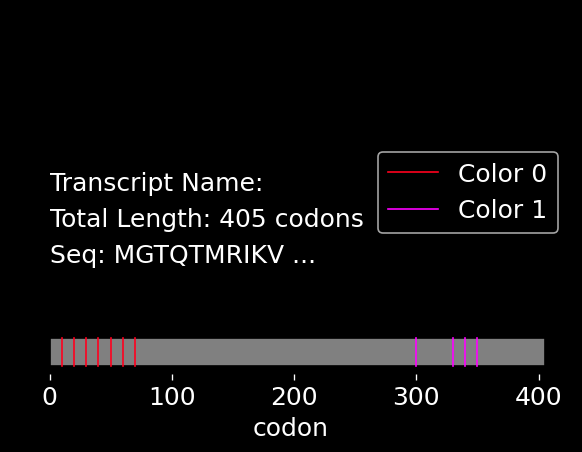

In [4]:
print(H2B_obj.tag_epitopes)

H2B_obj.tag_epitopes['T_Flag'] = [10,20,30,40,50,60,70]
H2B_obj.tag_epitopes['T_Hemagglutinin'] = [300,330,340,350]
print(H2B_obj.tag_epitopes)

rss.solver.protein=H2B_obj

H2B_obj.visualize_probe()


(2, 1001, 100)
Low memory, no recording: solved in 6.296358 seconds


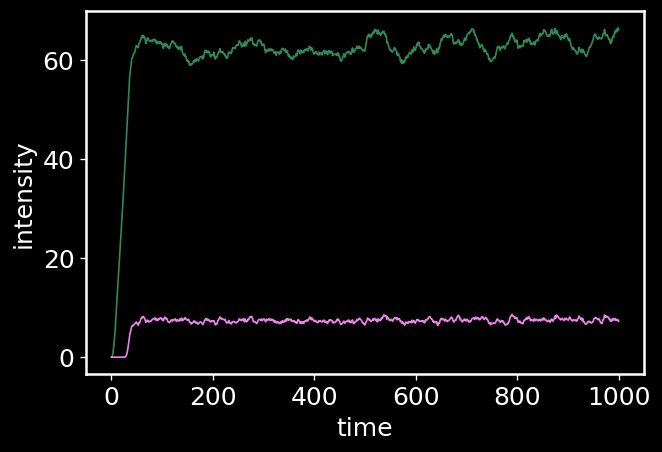

In [5]:

#with recording and low memory
sttime = time.time()
ssa_soln = rss.solver.solve_ssa(H2B_obj.kelong,t,ki=.33,n_traj=100)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)


{'T_Flag': [10, 20, 30, 40, 50, 60, 70], 'T_Hemagglutinin': [300, 330, 340, 350]}
{'T_Flag': [10, 20, 30, 40, 50, 60, 70], 'T_Hemagglutinin': [300, 330, 340, 350], 'T_1': [200, 210, 220, 230], 'T_2': [100, 110, 120, 130], 'T_3': [3, 67, 88]}


C:\Users\willi\Documents\GitHub\rSNAPsim\rsnapsim\poi.py:179: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


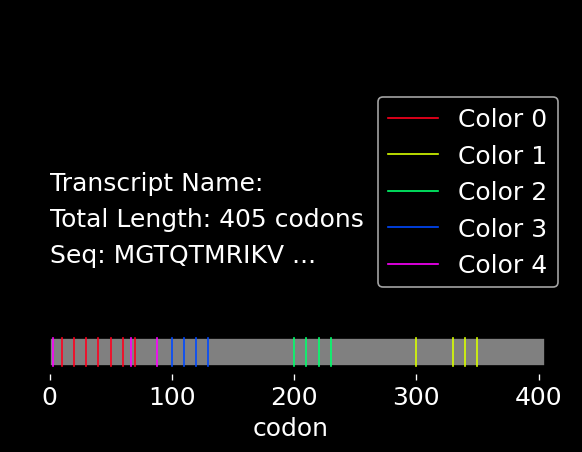

In [6]:
print(H2B_obj.tag_epitopes)

H2B_obj.tag_epitopes['T_Flag'] = [10,20,30,40,50,60,70]
H2B_obj.tag_epitopes['T_Hemagglutinin'] = [300,330,340,350]

H2B_obj.tag_epitopes['T_1'] = [200,210,220,230]
H2B_obj.tag_epitopes['T_2'] = [100,110,120,130]
H2B_obj.tag_epitopes['T_3'] = [3,67,88]

print(H2B_obj.tag_epitopes)

rss.solver.protein=H2B_obj

H2B_obj.visualize_probe()



(5, 1001, 2000)
Low memory, no recording: solved in 455.619185 seconds


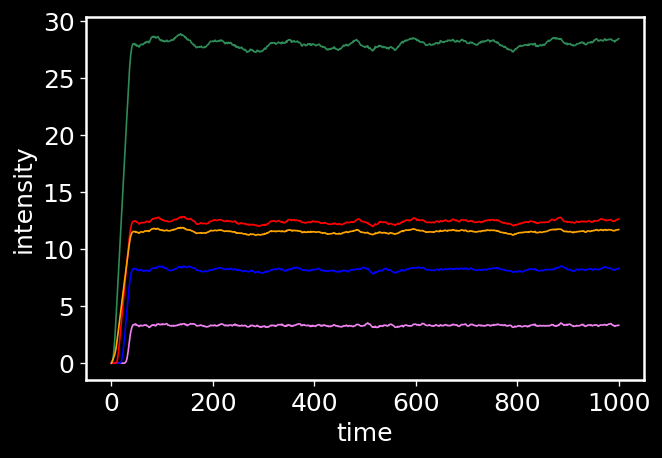

In [32]:
#with recording and low memory
sttime = time.time()
rss.solver.colors=5

ssa_soln = rss.solver.solve_ssa(H2B_obj.kelong,t,ki=.13,n_traj=2000, low_memory=True, record_stats=True)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[2],axis=1),color='blue',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[3],axis=1),color='red',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[4],axis=1),color='orange',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)

[[0. 0. 0. ... 7. 7. 7.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 3. 3. 3.]]
(405, 405)
(406, 1001)
Full ODE solution: solved in 1.208261 seconds
[[10, 20, 30, 40, 50, 60, 70], [300, 330, 340, 350], [200, 210, 220, 230], [100, 110, 120, 130], [3, 67, 88]]


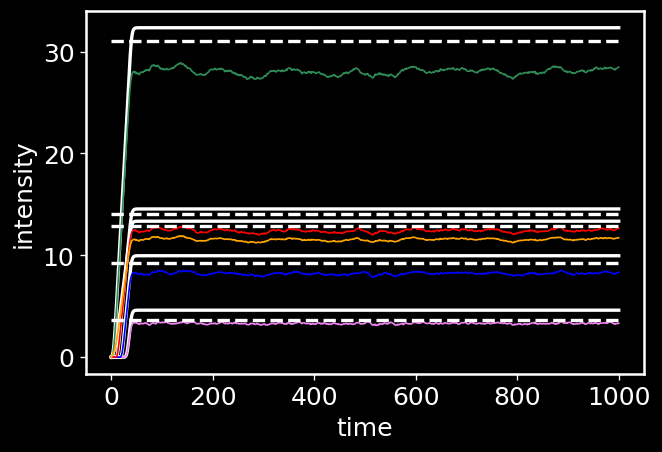

In [68]:
sttime = time.time()
x0 = np.zeros((len(H2B_obj.kelong),1))
ode_soln = rss.solver.solve_ode(H2B_obj.kelong,   t, x0, .13, H2B_obj.probe_loc  ,corr=False)
solvetime = time.time()-sttime


plt.plot(ode_soln.mu_It.T,'w',lw=2)
plt.xlabel('time')
plt.ylabel('intensity')
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[2],axis=1),color='blue',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[3],axis=1),color='red',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[4],axis=1),color='orange',alpha=1)
print("Full ODE solution: solved in %f seconds" % solvetime)



tau_analyticals,mean_analyticals,var_analyticals =rss.solver.solve_ballistic_model(.13, H2B_obj.ke_mu, poi= H2B_obj)


plt.plot([0,1000],[mean_analyticals[0]*7, mean_analyticals[0]*7],  'w--',lw=2)
plt.plot([0,1000],[mean_analyticals[1]*4, mean_analyticals[1]*4],  'w--',lw=2)
plt.plot([0,1000],[mean_analyticals[2]*4, mean_analyticals[2]*4],  'w--',lw=2)
plt.plot([0,1000],[mean_analyticals[3]*4, mean_analyticals[3]*4],  'w--',lw=2)
plt.plot([0,1000],[mean_analyticals[4]*3, mean_analyticals[4]*3],  'w--',lw=2)


In [70]:
ssa_soln.__dict__.keys()
x,y = np.unique(  np.hstack([ x[:,0] for x in ssa_soln.col_points]), return_counts=True)
collisions_per_trajectory = np.sum(y)/2000
average_rib = np.mean(ssa_soln.watched_ribs)


average_collision_per_ribosome = collisions_per_trajectory / average_rib
print(average_collision_per_ribosome)

5.041885998534949


In [51]:
np.sum(1/np.array(H2B_obj.kelong[:10]))

0.8891905746596426

### Leaky Probes set to have similar values

(5, 1001, 400)
Low memory, no recording: solved in 4.139928 seconds


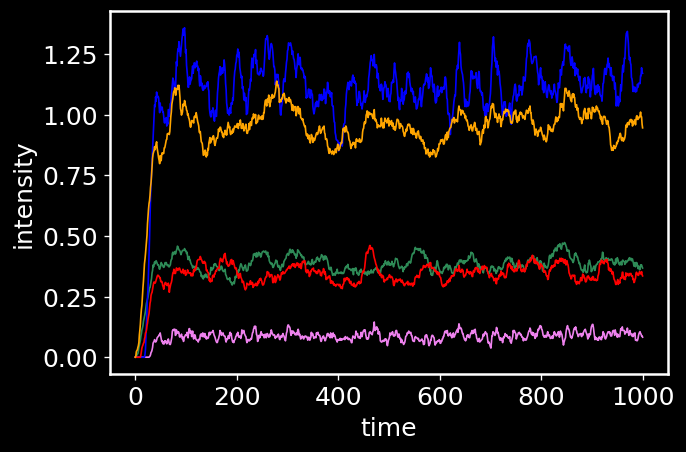

In [73]:
#with recording and low memory
sttime = time.time()


ssa_soln = rss.solver.solve_ssa(H2B_obj.kelong,t,n_traj=400,ki=.033, leaky_probes = True, kprobe=[.05,.1,.5,.1,.3],record_stats=True)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[2],axis=1),color='blue',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[3],axis=1),color='red',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[4],axis=1),color='orange',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)